## Black volatility and delta hedged pnl

implied volatility from black scholes model:

Introduction of black implied volatility:
-  implied probability density function from market option price
-  implied vol and realized vol

delta hedged portfolio
- how to delta hedge: cases when implied volatility and actual volatility are different
- effectiveness of delta hedged pnl

### Introduction to implied volatility

### Derivation of risk neutral density from market prices of European options. 

For a given expiration T and current stock price $S_0$, an European call option's discounted payoff would be given as:\
$V_t = Z(t,T)\cdot \mathbb{E}[Max(S_T - K, 0)]$, where $Z(t,T)$ is discount factor\
or to replace the expectation with a risk neutral probability density function $\psi = \psi(S)$, \
so that $V_t = Z(t,T)\cdot \int_{0}^{\infty}\psi(S) Max(S-K,0)dS = Z(t,T)\cdot \int_{K}^{\infty}\psi(S) (S-K)dS $\
\
Differentiate $V_t$ with respect to $K$ to obtain:\
\
$\frac{\delta V_t}{\delta K} = -Z(t,T)\cdot \int_{K}^{\infty}\psi(S) dS$\
\
Differentiate twice $V_t$ w.r.t K to obtain:\
\
$\frac{\delta^2 V_t}{\delta K^2} = -Z(t,T)\cdot \frac{\delta}{\delta K}\int_{K}^{\infty}\psi(S) dS =-Z(t,T) [\int_{K+dk}^{\infty}\psi(S)ds - \int_{K}^{\infty}\psi(S)ds]\cdot \frac{1}{dk} = -Z(t,T)\cdot [\frac{-\psi(k)dk}{dk}] = Z(t,T)\cdot \psi(k)$\
\
Hence finally, we have 
$\psi(k) = \frac{1}{Z(t,T)}\cdot\frac{\delta^2 V_t}{\delta K^2}$
Given a series of European option prices for different strikes K, one can calcualte the underlying market implied probability distribution for underlying price S. The equation is model-free as there is no assumption.

Also, the implied probablity function w.r.t K can be used to derive the Dupire equation, which is local volatility equation developped from practitioners persecpective, which allows them to price exotic options consistently with the known prices of vanilla options.\
with apendix below:
\begin{equation}
\frac{\delta V_t}{\delta t} = \int_{K}^{\infty} \frac{\delta \psi(S,t)}{\delta t}\cdot (S_T-K)dS = \int_{K}^{\infty} [-\frac{\delta(\mu S_t \psi)}{\delta S} + \frac{1}{2}\cdot \frac{\delta^2\sigma^2 S_t^2\psi}{\delta S_t^2}]\cdot(S_T-K)dS = \int_{K}^{+\infty}[-\mu\psi(S,T)+\sigma^2\psi(S,T)] \cdot (S_T-K)dS = \frac{1}{2}\sigma ^2 K^2 \psi + \mu(V-K\psi)
\end{equation}


### Delta hedge portfolio:

Given BS formula of a vanilla call otion as below:
\begin{equation}    
V = S\cdot N(d_1) - K \cdot e^{-rT}\cdot N(d_2)
\end{equation}

option delta: $\Delta = \frac{\delta V}{\delta S} = N(d_1)$ \
\
where $d_1 = \frac{\log{\frac{S}{K}}+(r+\frac{1}{2}\sigma^{2})(T-t)}{\sigma (\sqrt{T-t})}$

We can agree on S, K, T and maybe r, but how should we select $\sigma$?\
Should we use implied volatility or realized volatility instead?

Consider we construct a portfolio with long call option and short stock with a delta $\Delta$ amount shares as delta hedge.\
Our PnL consists of 2 parts:
- PnL of option itself, of which we are long, which comprises interest on the premium paied at initiation; 
- PnL generated by the delta hedge, which incorporates interest we recieve on the money we sell $\Delta$ shares, as well as money we make by trading shares during $\delta t$

#### Hedge with actual vol 
MtM PnL of a portfolio by buying option $V^i$ and hedge with $\Delta^a$ (with actual volatility) of the stock:\
\
MtM PnL = $dV^i - rV^idt - \Delta^adS + (r-q)\Delta^aSdt$
\
While assume that option value will be corrected to actual volatility $V^a$, we then have:\
$dV^a - rV^adt - \Delta^adS + (r-q)\Delta^aSdt$

Hence the potential mark-to-market profit will be:\
profit = $dV^i-dV^a-r(V^i-V^a)dt$
\
Using Ito's lemma as $dV = \Theta dt + \Delta ds + \frac{1}{2} \Gamma \sigma^2 S^2 dt$ 
\
The mark-to-market profit will be realized as:\
$=\Theta^i dt+ \Delta^i ds + \frac{1}{2}\Gamma^i\sigma^2S^2dt - \Delta^ads - rV^adt +(r-q)\Delta^aSdt-r(V^i-V^a)dt$\
$=\Theta^idt + (\Delta^i - \Delta^a)(\mu Sdt + \sigma SdW) + \frac{1}{2}\Gamma^i\sigma^2S^2dt-rV^adt+(r-q)\Delta^aSdt-r(V^i-V^a)dt$\
$=\Theta^idt +(\Delta^i - \Delta^a)(\mu Sdt + \sigma SdW) + \frac{1}{2}\Gamma^i\sigma^2S^2dt +(r-q)\Delta^aSdt-rV^idt$\
$=\Theta^idt +(\Delta^i - \Delta^a)(\mu Sdt + \sigma SdW) + \frac{1}{2}\Gamma^i\sigma^2S^2dt+(r-q)\Delta^aSdt-(\Theta^idt+rs\Delta^idt+\frac{1}{2}\Gamma^i\sigma^2S^2dt -qS\Delta^idt)$\
$=(\Delta^i-\Delta^a)(\mu Sdt+\sigma S dW)+\frac{1}{2}\Gamma^i(\sigma^2 - \tilde \sigma^2)S^2dt - (\Delta^i-\Delta^a)rSdt + (\Delta^i-\Delta^a)qSdt$\
$=\frac{1}{2}\Gamma^i(\sigma^2-\tilde\sigma^2)S^2dt + (\Delta^i-\Delta^a){(\mu-r-q)Sdt+\sigma SdW}$

\
Final profit is guaranted, which is difference between theoretical option values with 2 types of volatilities but how the profit is achieved is random due to the randomness $dW$ term  

#### Hedge with implied vol 
MtM PnL of a portfolio by buying option $V^i$ and hedge with $\Delta^i$ (with implied volatility) of the stock:
\
MtM PnL = $dV^i - rV^idt - \Delta^idS + (r-q)\Delta^iSdt$
\
with Ito's lemma:\
The mark-to-market will be realized as:\
$=\Theta^i dt + \Delta^i dS + \frac{1}{2} \Gamma^i\sigma^2S^2dt - rV^i dt -\Delta^i dS +(r-q)\Delta^iSdt$
$=\Theta^i dt + \frac{1}{2} \Gamma^i\sigma^2S^2dt - rV^i dt -\Delta^i dS +(r-q)\Delta^iSdt$\
where $rV^idt = \Theta^idt+(r-q)S\Delta^iSdt+\frac{1}{2}\Gamma^i\tilde\sigma^2S^2dt$\
plug in above formula, we will have:\
$=\frac{1}{2}\Gamma^i(\sigma^2-\tilde \sigma^2)S^2dt$
\
Daily PnL is deterministic without random term, while integrate the differential equation, we will have cumulative profit:
$\frac{1}{2}(\sigma^2-\tilde\sigma^2)\cdot \int_{t_0}^{T}e^{-rt} \cdot S^2 \Gamma^idt$

In [1]:
# Load the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import math
import scipy.stats
import seaborn as sns
from IPython.display import Image

from financepy.utils import *
from financepy.products.equity import *
from financepy.market.curves import *
from financepy.models.black_scholes import *

####################################################################
# FINANCEPY BETA Version 0.270 - This build:  13 Feb 2023 at 17:38 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
#  Report bugs as issues at https://github.com/domokane/FinancePy  #
####################################################################



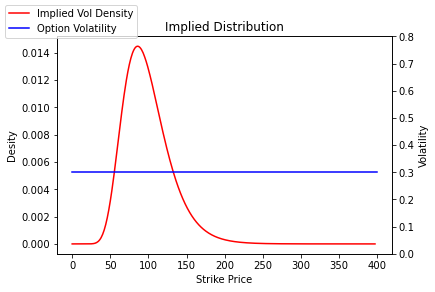

In [3]:
start_date = Date(1,12,2025)
maturity = 1
expiry_date = start_date.add_years(maturity)
call_prices = []
disc_g=[]
option_volatility = []
r =0.01
q =0.005
disc_factor = exp(-r*maturity)

discount_curve = DiscountCurveFlat(valuation_date=start_date,flat_rate=r) 
q_curve = DiscountCurveFlat(valuation_date=start_date,flat_rate=q)
strikes = np.linspace(1,400,400)
for k in strikes:
    call_option = EquityVanillaOption(expiry_date=expiry_date, strike_price=k, option_type=OptionTypes.EUROPEAN_CALL)
    option_vol = 0.3
    model = BlackScholes(option_vol)
    call_prices.append(call_option.value(valuation_date=start_date,stock_price=100,discount_curve=discount_curve,dividend_curve=q_curve,model=model))
    option_volatility.append(option_vol)

for j in range(1,len(call_prices)-1):
    g = (call_prices[j+1]-2*call_prices[j]+call_prices[j-1])/(strikes[j]-strikes[j-1])**2
    disc_g.append(g/disc_factor)

fig,ax1=plt.subplots()
ax2 = ax1.twinx()
ax1.plot(disc_g,c='r',label="Implied Vol Density")
ax2.plot(option_volatility,c='b',label="Option Volatility")
ax1.set_xlabel("Strike Price")
ax1.set_ylabel("Desity")
ax2.set_ylabel("Volatility")
ax2.set_ylim((0.0,0.8))
plt.title("Implied Distribution")
fig.legend(loc="upper left")

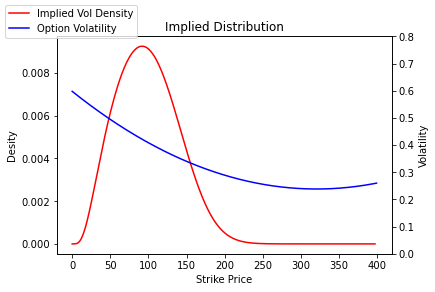

In [4]:
start_date = Date(1,12,2025)
maturity = 1
expiry_date = start_date.add_years(maturity)

call_prices = []
disc_g=[]
option_volatility = []
r =0.01
q =0.005
disc_factor = exp(-r*maturity)

discount_curve = DiscountCurveFlat(valuation_date=start_date,flat_rate=r) 
q_curve = DiscountCurveFlat(valuation_date=start_date,flat_rate=q)
strikes = np.linspace(1,400,400)
S=100

for k in strikes:
    call_option = EquityVanillaOption(expiry_date=expiry_date, strike_price=k, option_type=OptionTypes.EUROPEAN_CALL)
    inverse_moneyness = k/S
    option_vol = 0.035*inverse_moneyness**2 - 0.225*inverse_moneyness + 0.6
    model = BlackScholes(option_vol)
    call_prices.append(call_option.value(valuation_date=start_date,stock_price=S,discount_curve=discount_curve,dividend_curve=q_curve,model=model))
    option_volatility.append(option_vol)

for j in range(1,len(call_prices)-1):
    g = (call_prices[j+1]-2*call_prices[j]+call_prices[j-1])/(strikes[j]-strikes[j-1])**2
    disc_g.append(g/disc_factor)

fig,ax1=plt.subplots()
ax2 = ax1.twinx()
ax1.plot(disc_g,c='r',label="Implied Vol Density")
ax2.plot(option_volatility,c='b',label="Option Volatility")
ax1.set_xlabel("Strike Price")
ax1.set_ylabel("Desity")
ax2.set_ylabel("Volatility")
ax2.set_ylim((0.0,0.8))
plt.title("Implied Distribution")
fig.legend(loc="upper left")

In [5]:
import math

def OptionSim(S0, strike_price, rf, mu,q, sigma, expiry_T, N: int):
    
    day = int(datetime.datetime.today().strftime('%d'))
    month = int(datetime.datetime.today().strftime('%m'))
    year = int(datetime.datetime.today().strftime('%Y'))
    
    # Get the option start and expiry date
    valuation_date = Date(day, month, year)
    expiry_date = valuation_date.add_years(expiry_T)
    
    # Assign the element for call option value function
    call_option = EquityVanillaOption(expiry_date,strike_price,OptionTypes.EUROPEAN_CALL)
    
    discount_curve = DiscountCurveFlat(valuation_date,rf,FrequencyTypes.CONTINUOUS)
    
    dividend_curve = DiscountCurveFlat(valuation_date,q)
    
    model = BlackScholes(sigma)
    
    call_option_value = call_option.value(
        valuation_date,
        S0,
        discount_curve,
        dividend_curve,
        model
    )
    
    call_option_delta = call_option.delta(
        valuation_date,
        S0,
        discount_curve,
        dividend_curve,
        model
    )
    
    cash_t0 = call_option_value
    delta_t0 = call_option_delta
    cash_balance_t0 = cash_t0 - delta_t0 * S0
    
    ################################################################################################################################
    
    # Calculate the number of time that we have to rebalance our hedging portfolio
    num_of_rebalance = math.floor(N * expiry_T)
    dt = expiry_T / N
    
    # Following lognormal distribution, calculate the stock price at each rebalance time
    S_t = S0
    
    # Update cash value at each time step
    cash_balance_t = cash_balance_t0
    cost_of_stock = S0 * delta_t0 # ATM delta is 0.5, initial cost_of_stock
    
    for i in range(1, num_of_rebalance):
        
        # Update delta and stock price
        valuation_date = valuation_date.add_years(dt) # updating the valuation date
        g = np.random.normal(0, 1) # the random draw from Gaussian distribution
        
        # updating the stock price
        S_t += S_t * (mu * dt + sigma * g * np.sqrt(dt))
        
        # update discount curve
        discount_curve = DiscountCurveFlat(
            valuation_date,
            rf,
            FrequencyTypes.CONTINUOUS
        )
        
        # update dividend curve
        dividend_curve = DiscountCurveFlat(
            valuation_date,
            q
        )
        
        # updating option price
        call_option_value_t = call_option.value(
            valuation_date,
            S_t,
            discount_curve,
            dividend_curve,
            model
        )
        
        # updating option delta
        call_option_delta_t = call_option.delta(
            valuation_date,
            S_t,
            discount_curve,
            dividend_curve,
            model
        )
        
        # update the portfolio value
        if i == 1:
            delta_change = call_option_delta_t - delta_t0 # delta at time t == 0 is 0.5
        else:
            delta_change = call_option_delta_t - last_delta
            
        # Store the previous delta
        last_delta = call_option_delta_t
        cost_of_stock = delta_change * S_t 
        cash_balance_t = cash_balance_t * np.exp(rf * dt) # calc the interest on the cash balance
        cash_balance_t -= cost_of_stock

    S_T = S_t + S_t * (mu * dt + sigma * g * np.sqrt(dt))
    
    call_option_payoff = np.max([S_T-strike_price, 0])
    cash_balance = cash_balance_t * np.exp(rf * dt)
    portfolio_value = cash_balance + last_delta * S_T
    replicating_error = portfolio_value - call_option_payoff
    
    results = (S_T, call_option_payoff, last_delta,cash_balance,portfolio_value,replicating_error)
    
    return results

In [6]:
delta_hedged_ptf = []
payoff = []
st_list=[]
for i in range(500):
    result = OptionSim(100,100,0.05,0.01,0.005,0.2,1,100)
    delta_hedged_ptf.append(result[4])
    payoff.append(result[1])
    st_list.append(result[0])

In [7]:
plot_result = pd.DataFrame({
    'Final Stock Value': st_list,
    'Call Option Payoff': payoff,
    'Delta Hedged Portfolio Value': delta_hedged_ptf,
    'Hedging error':np.array(payoff)-np.array(delta_hedged_ptf)}                       
                           )
plot_result

,Final Stock Value,Call Option Payoff,Delta Hedged Portfolio Value,Hedging error
0,81.687805,0.000000,0.147661,-0.147661
1,99.002145,0.000000,1.165452,-1.165452
2,112.313605,12.313605,10.435206,1.878399
3,109.687577,9.687577,8.594360,1.093217
4,73.859758,0.000000,-0.514346,0.514346
...,...,...,...,...
495,99.272317,0.000000,1.996624,-1.996624
496,124.330304,24.330304,22.800621,1.529683
497,119.607606,19.607606,18.433814,1.173792
498,78.209476,0.000000,-0.919104,0.919104


Text(0, 0.5, 'Payoff')

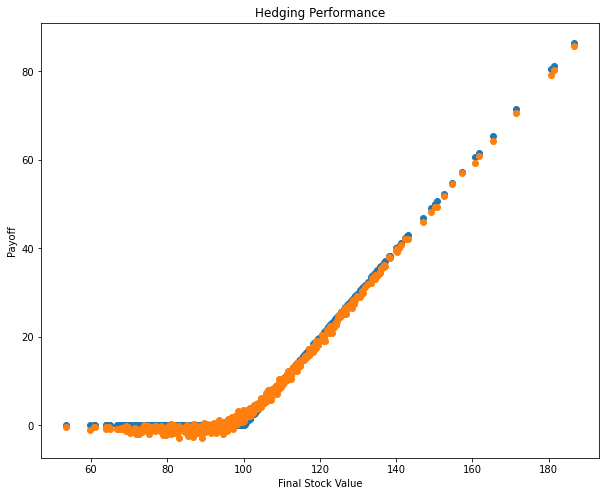

In [8]:
plt.figure(figsize=(10,8))
plt.scatter(plot_result['Final Stock Value'], plot_result['Call Option Payoff'])
plt.scatter(plot_result['Final Stock Value'], plot_result['Delta Hedged Portfolio Value'])
plt.title('Hedging Performance')
plt.xlabel('Final Stock Value')
plt.ylabel('Payoff')

Text(0.5, 1.0, 'Call Option Delta Hedging Portfolio Value Distribution')

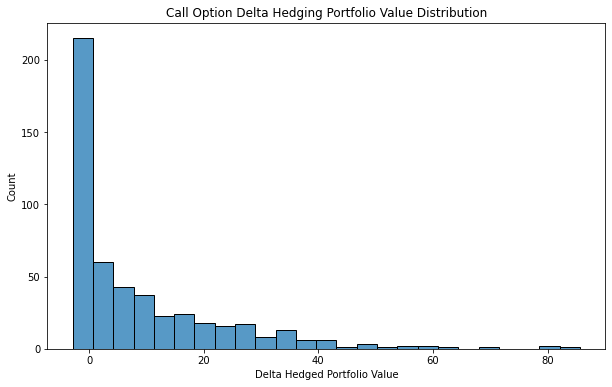

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(data=plot_result['Delta Hedged Portfolio Value']).set_title('Call Option Delta Hedging Portfolio Value Distribution')

Text(0.5, 1.0, 'Call Option Delta Hedging Portfolio Error Distribution')

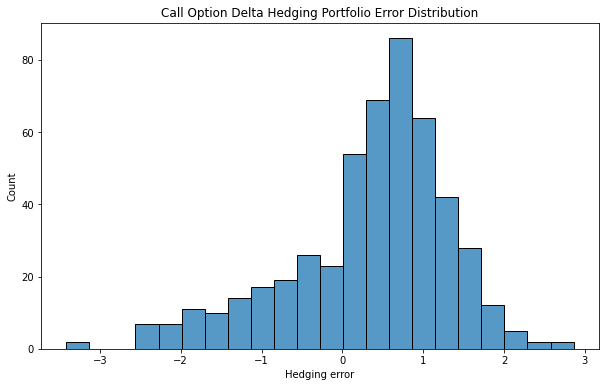

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(data=plot_result['Hedging error']).set_title('Call Option Delta Hedging Portfolio Error Distribution')

### Delta hedge with actual vol

In [ ]:
from financepy.utils.date import *

def gbm(s0,mu,sigma,T,dt,n_scenarios):
    """
    Evolution of a stock price using a geometric brownian motion model
    """
    n_steps = int(T/dt)
    rets_plus_one = np.random.normal(loc=(1+mu*dt),scale=sigma*np.sqrt(dt),size=(n_steps,n_scenarios))
    rets_plus_one[0]=1
    # convert to price
    prices = s0*pd.DataFrame(rets_plus_one).cumprod()
    return prices

def actual_delta_hedged_ptf(S0, strike_price, rf, mu, q, sigma_actual,sigma_implied, T, dt, n_scenarios=1):
    
    day = int(datetime.datetime.today().strftime('%d'))
    month = int(datetime.datetime.today().strftime('%m'))
    year = int(datetime.datetime.today().strftime('%Y'))
    
    # Get the option start and expiry date
    valuation_date = Date(day, month, year)
    expiry_date = valuation_date.add_years(T)
    
    n_steps = int(T/dt)

    valuation_spot_dates = valuation_date.add_years(np.linspace(dt,T,n_steps-1))
    valuation_spot_dates.insert(0,valuation_date)
    
    #set up BSM model
    call_option = EquityVanillaOption(expiry_date,strike_price,OptionTypes.EUROPEAN_CALL)
    
    model_implied = BlackScholes(sigma_implied)
    model_actual = BlackScholes(sigma_actual)
    
    
    #GBM simulation
    S_t_path = gbm(S0, mu, sigma_actual, T, dt, n_scenarios)   

    df_call_option_value_actual, df_call_option_value_implied = pd.DataFrame(), pd.DataFrame()

    
    for i in range(len(valuation_spot_dates)):
        discount_curve = DiscountCurveFlat(valuation_spot_dates[i],rf,FrequencyTypes.CONTINUOUS)
        dividend_curve = DiscountCurveFlat(valuation_spot_dates[i],q)
        call_option_value_actual = call_option.value(valuation_spot_dates[i],S_t_path.loc[i],discount_curve,dividend_curve,model_actual)
        call_option_value_implied = call_option.value(valuation_spot_dates[i],S_t_path.loc[i],discount_curve,dividend_curve,model_implied)

        df_call_option_value_actual = pd.concat([df_call_option_value_actual,call_option_value_actual],axis=1)
        df_call_option_value_implied = pd.concat([df_call_option_value_implied,call_option_value_implied],axis=1)
    
    df_call_option_value_actual = df_call_option_value_actual.T
    df_call_option_value_implied = df_call_option_value_implied.T
    
    d_option_value_actual =  df_call_option_value_actual.diff()
    d_option_value_implied =  df_call_option_value_implied.diff()
    d_option_value_actual=d_option_value_actual.fillna(0)
    d_option_value_implied=d_option_value_implied.fillna(0)
    
    diff_actual_implied = df_call_option_value_actual- df_call_option_value_implied
    
    daily_mtm_pnl =d_option_value_implied- d_option_value_actual - mu*(df_call_option_value_implied-df_call_option_value_actual)*dt
    ytd_mtm_pnl = daily_mtm_pnl.cumsum()
    
    ytd_mtm_pnl.index = np.linspace(dt,T,n_steps)
    
    return ytd_mtm_pnl

In [24]:
n_scenarios = 10
df_mtm_ytd = pd.DataFrame()

for i in range(n_scenarios):
    q=actual_delta_hedged_ptf(100, 100, 0.01, 0.02, 0.001, 0.5,0.2,1,0.005,1)
    df_mtm_ytd = pd.concat([df_mtm_ytd,q],axis=1)

<AxesSubplot:>

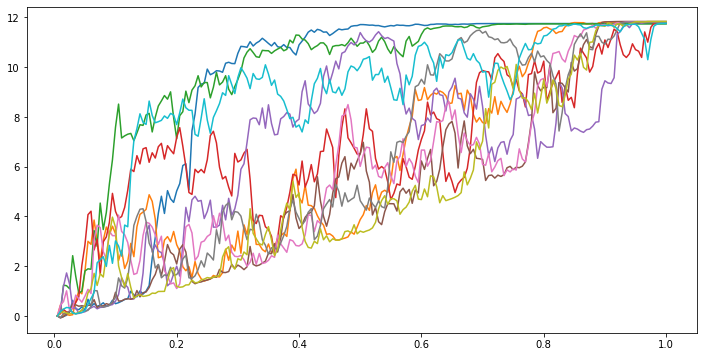

In [25]:
df_mtm_ytd.plot(figsize=(12,6),legend=False)

Observation:
- Final profit is guranteed which is difference between theoretical vol and actual realised vol
- the daily profit is not guranteed as it would be achieved rather randomly due to the randomness term $dX$
- when underlying price changes, option value changes but these changes not cancel out each other, which is not favorable from risk mgmt perspective.

### Hedge with implied vol

In [26]:
def implied_delta_hedged_ptf(S0, strike_price, rf, mu, q, sigma_actual,sigma_implied, T, dt, n_scenarios=1):
    
    day = int(datetime.datetime.today().strftime('%d'))
    month = int(datetime.datetime.today().strftime('%m'))
    year = int(datetime.datetime.today().strftime('%Y'))
    
    # Get the option start and expiry date
    valuation_date = Date(day, month, year)
    expiry_date = valuation_date.add_years(T)
    
    n_steps = int(T/dt)

    valuation_spot_dates = valuation_date.add_years(np.linspace(dt,T,n_steps-1))
    valuation_spot_dates.insert(0,valuation_date)
    
    #set up BSM model
    call_option = EquityVanillaOption(expiry_date,strike_price,OptionTypes.EUROPEAN_CALL)    
    model_implied = BlackScholes(sigma_implied)

    
    #GBM simulation
    S_t_path = gbm(S0, mu, sigma_actual, T, dt, n_scenarios)   

    df_call_option_value_implied = pd.DataFrame()
    df_call_option_delta_implied = pd.DataFrame()
    
    for i in range(len(valuation_spot_dates)):
        discount_curve = DiscountCurveFlat(valuation_spot_dates[i],rf,FrequencyTypes.CONTINUOUS)
        dividend_curve = DiscountCurveFlat(valuation_spot_dates[i],q)
        call_option_value_implied = call_option.value(valuation_spot_dates[i],S_t_path.loc[i],discount_curve,dividend_curve,model_implied)
        call_option_delta_implied = call_option.delta(valuation_spot_dates[i],S_t_path.loc[i],discount_curve,dividend_curve,model_implied)  


        df_call_option_value_implied = pd.concat([df_call_option_value_implied,call_option_value_implied],axis=1)
        df_call_option_delta_implied = pd.concat([df_call_option_delta_implied,call_option_delta_implied],axis=1)   
    
    df_call_option_value_implied = df_call_option_value_implied.T
    df_call_option_delta_implied = df_call_option_delta_implied.T
    
    d_option_value_implied =  df_call_option_value_implied.diff()
    d_stock_value = pd.DataFrame(S_t_path).diff()
    
    d_option_value_implied=d_option_value_implied.fillna(0)
    d_stock_value=d_stock_value.fillna(0)

    daily_mtm_pnl = -1*(d_option_value_implied- df_call_option_delta_implied*d_stock_value - mu*(df_call_option_value_implied-df_call_option_delta_implied*S_t_path)*dt - df_call_option_delta_implied*q*S_t_path*dt)
    
    ytd_mtm_pnl = daily_mtm_pnl.cumsum()
    ytd_mtm_pnl.index = np.linspace(dt,T,n_steps)
    
    return S_t_path,d_stock_value,df_call_option_value_implied,df_call_option_delta_implied,d_option_value_implied,daily_mtm_pnl,ytd_mtm_pnl

In [30]:
n_scenarios = 10
df_mtm_ytd_imp = pd.DataFrame()

for i in range(n_scenarios):
    q=implied_delta_hedged_ptf(100, 100, 0.01, 0.02, 0.001,0.5,0.2,1,0.005,1)
    df_mtm_ytd_imp = pd.concat([df_mtm_ytd_imp,q[-1]],axis=1)

<AxesSubplot:>

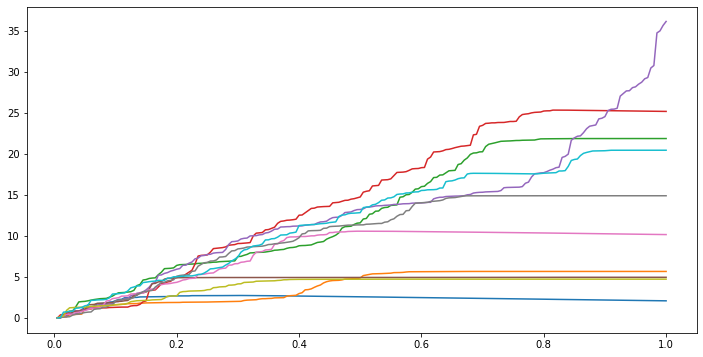

In [31]:
df_mtm_ytd_imp.plot(figsize=(12,6),legend=False)

Observation: 
- Daily profit is deterministic as no random term left after hedging with implied vol delta
- no need to know the actual volatility during hedging
- path dependant, as the final profit is not guaranteed